# Notebook to visualize VCR Data

In [38]:
from pathlib import Path
import jsonlines as jsnl
import json
from tqdm import tqdm_notebook as tqdm

In [32]:
import matplotlib
matplotlib.use('agg')

In [33]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt

In [35]:
import PIL

In [2]:
vcr_tdir = Path('../data/vcr1/')

In [4]:
vcr_imgs = vcr_tdir / 'vcr1images'

In [6]:
train_file = vcr_tdir / 'train.jsonl'

In [25]:
train_ann = jsnl.Reader(open(train_file))

In [26]:
t1 = []
for t in tqdm(train_ann.iter()):
#     print(t)
    t1.append(t)

In [27]:
len(t1)

212923

In [30]:
ann1 = t1[0]

In [31]:
ann1

{'movie': '3015_CHARLIE_ST_CLOUD',
 'objects': ['person', 'person', 'person', 'car'],
 'interesting_scores': [0],
 'answer_likelihood': 'possible',
 'img_fn': 'lsmdc_3015_CHARLIE_ST_CLOUD/3015_CHARLIE_ST_CLOUD_00.23.57.935-00.24.00.783@0.jpg',
 'metadata_fn': 'lsmdc_3015_CHARLIE_ST_CLOUD/3015_CHARLIE_ST_CLOUD_00.23.57.935-00.24.00.783@0.json',
 'answer_orig': 'No she does not',
 'question_orig': 'Does 3 feel comfortable?',
 'rationale_orig': 'She is standing with her arms crossed and looks disturbed',
 'question': ['Does', [2], 'feel', 'comfortable', '?'],
 'answer_match_iter': [3, 0, 2, 1],
 'answer_sources': [3287, 0, 10184, 2260],
 'answer_choices': [['Yes',
   'because',
   'the',
   'person',
   'sitting',
   'next',
   'to',
   'her',
   'is',
   'smiling',
   '.'],
  ['No', 'she', 'does', 'not', '.'],
  ['Yes',
   ',',
   'she',
   'is',
   'wearing',
   'something',
   'with',
   'thin',
   'straps',
   '.'],
  ['Yes', ',', 'she', 'is', 'cold', '.']],
 'answer_label': 1,
 'rati

In [98]:
ann1.keys()

dict_keys(['movie', 'objects', 'interesting_scores', 'answer_likelihood', 'img_fn', 'metadata_fn', 'answer_orig', 'question_orig', 'rationale_orig', 'question', 'answer_match_iter', 'answer_sources', 'answer_choices', 'answer_label', 'rationale_choices', 'rationale_sources', 'rationale_match_iter', 'rationale_label', 'img_id', 'question_number', 'annot_id', 'match_fold', 'match_index'])

In [99]:
ann1['objects']

['person', 'person', 'person', 'car']

In [159]:
img = PIL.Image.open(vcr_imgs / ann1['img_fn'])

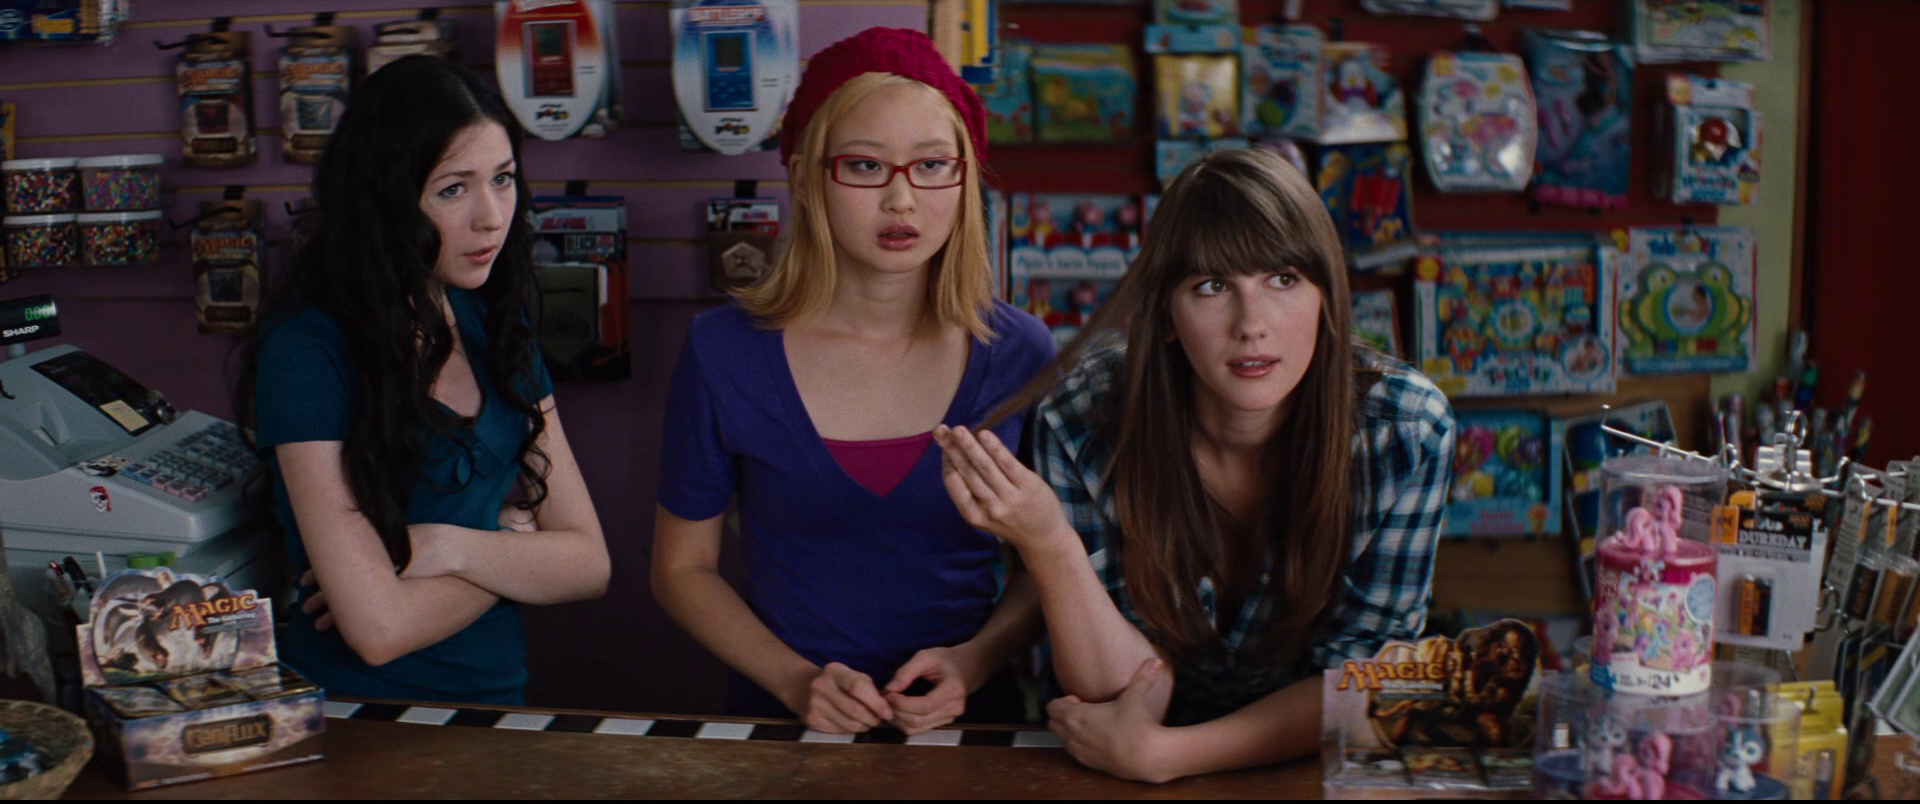

In [160]:
img

In [39]:
metd = json.load(open(str(vcr_imgs / ann1['metadata_fn'])))

In [41]:
metd.keys()

dict_keys(['boxes', 'segms', 'names', 'width', 'height'])

In [45]:
metd['names']

['person', 'person', 'person', 'car']

In [50]:
metd['boxes'][3]

[2.4555816650390625,
 331.0960693359375,
 277.36383056640625,
 579.8651733398438,
 0.7267032265663147]

In [130]:
poly1 = metd['segms'][-1][0]

In [132]:
p1 = [tuple(x) for x in poly1]

In [161]:
draw = PIL.ImageDraw.Draw(img, 'RGBA')

In [164]:
draw.polygon(p1, fill=(255, 0, 0, 128), outline=(0, 0, 0, 128))

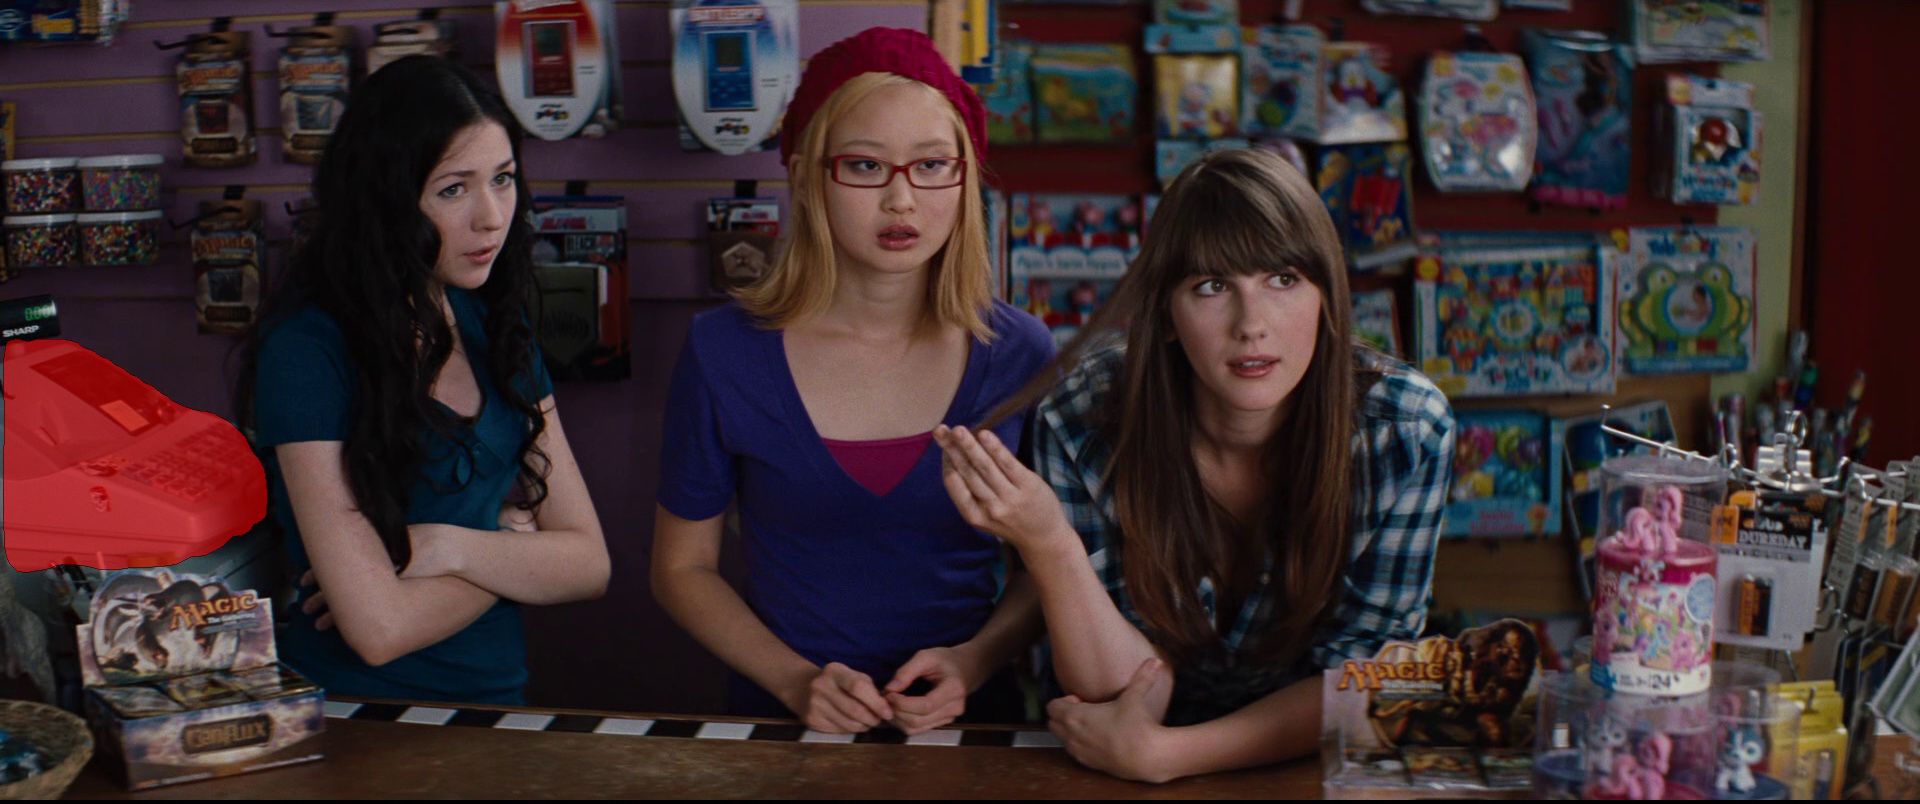

In [165]:
img